<a href="https://colab.research.google.com/github/natifernandezs/Redes_Metabolicas/blob/main/Redesmetabolicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cobra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 969.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00


# Stoichiometric Interpretation of Esterichia coli Glucose Catabolism under Varoious Oxygenation Rates

Amit Varma, Brian W. Boesch and Bernard Palsson

In [ ]:
import cobra
from cobra.io import load_model

model = load_model("iAF1260")

Output()

In [ ]:
model

Name,iAF1260
Memory address,78f49f0157b0
Number of metabolites,1668
Number of reactions,2382
Number of genes,1261
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iAF1260_core_59p81M - 1.0*BIOMASS_Ec_iAF1260_core_59p81M_reverse_3925e
Compartments,"cytosol, periplasm, extracellular space"


In [ ]:
cobra.util.linear_reaction_coefficients(model)


{<Reaction BIOMASS_Ec_iAF1260_core_59p81M at 0x78f49d8adf90>: 1.0}

Modelo no óptimo en esta iteración
Primer valor no nulo de acetato: q_acetato = 0.1295085378346632, mu = 0.9334040664298707
Primer valor no nulo de formato: q_formato = 0.17367579916520295, mu = 1.119226045255434
Primer valor no nulo de etanol: q_ethanol = 0.1375056546253628, mu = 1.6465094943916825


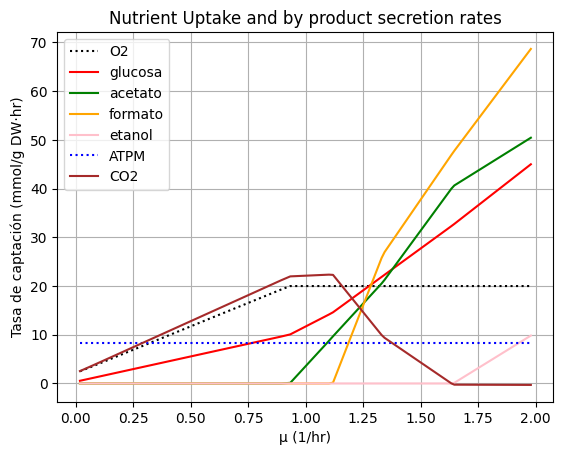

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las reacciones clave en el modelo
oxygen_rxn = model.reactions.get_by_id("EX_o2_e")
glucose_rxn = model.reactions.get_by_id("EX_glc__D_e")
biomass_rxn = model.reactions.get_by_id("BIOMASS_Ec_iAF1260_core_59p81M")
acetate_rxn = model.reactions.get_by_id("EX_ac_e")
formate_rxn = model.reactions.get_by_id("EX_for_e")
ethanol_rxn = model.reactions.get_by_id("EX_etoh_e")
CO2_rxn = model.reactions.get_by_id("EX_co2_e")
ATPM= model.reactions.get_by_id("ATPM")
oxygen_rxn.bounds = (-20, 0)

# Inicializar listas para almacenar los resultados
glucose = np.linspace(0.1, 45, 100)  # Rango de captación de glucosa
q_oxygen = []
q_glucose = []
growth_rates = []
q_acetate = []
q_formate = []
q_ethanol = []
q_co2 = []
q_atpm=[]

# Bandera para controlar la impresión del primer valor no nulo
found_first_acetate = False
found_first_formate = False
found_first_ethanol = False

# Simulaciones a diferentes tasas de captación de glucosa
for qglc in glucose:
    with model:
        # Establecer el límite de captación de glucosa
        glucose_rxn.bounds = (-qglc, 0.0)

        # Optimizar el modelo
        solution = model.optimize()

        if solution.status == 'optimal':
            # Obtener las tasas de crecimiento, captación de O2 y captación de glucosa
            mu = solution.objective_value
            qo2 = solution.fluxes[oxygen_rxn.id]
            qglc = solution.fluxes[glucose_rxn.id]
            qac = solution.fluxes[acetate_rxn.id]
            qfor = solution.fluxes[formate_rxn.id]
            qet = solution.fluxes[ethanol_rxn.id]
            qco2 = solution.fluxes[CO2_rxn.id]
            qatpm = solution.fluxes[ATPM.id]

            # Almacenar los resultados
            growth_rates.append(mu)
            q_glucose.append(-qglc)
            q_oxygen.append(-qo2)
            q_acetate.append(qac)
            q_formate.append(qfor)
            q_ethanol.append(qet)
            q_co2.append(qco2)
            q_atpm.append(qatpm)


            # Imprimir el primer valor cuando qac, qfor o qet sean diferentes de 0
            if qac != 0 and not found_first_acetate:
                print(f"Primer valor no nulo de acetato: q_acetato = {qac}, mu = {mu}")
                found_first_acetate = True

            if qfor != 0 and not found_first_formate:
                print(f"Primer valor no nulo de formato: q_formato = {qfor}, mu = {mu}")
                found_first_formate = True

            if qet != 0 and not found_first_ethanol:
                print(f"Primer valor no nulo de etanol: q_ethanol = {qet}, mu = {mu}")
                found_first_ethanol = True
        else:
            print("Modelo no óptimo en esta iteración")


# Crear el gráfico
plt.plot(growth_rates, q_oxygen, label='O2', linestyle=':', color='black')
plt.plot(growth_rates, q_glucose, label='glucosa', linestyle='-', color='red')
plt.plot(growth_rates, q_acetate, label="acetato", linestyle='-', color='green')
plt.plot(growth_rates, q_formate, label="formato", linestyle='-', color='orange')
plt.plot(growth_rates, q_ethanol, label="etanol", linestyle='-', color='pink')
plt.plot(growth_rates, q_atpm, label="ATPM", linestyle=':', color='blue')
plt.plot(growth_rates, q_co2, label="CO2", linestyle='-', color='brown')
plt.xlabel('μ (1/hr)')
plt.ylabel('Tasa de captación (mmol/g DW·hr)')
plt.title('Nutrient Uptake and by product secretion rates')
plt.legend()
plt.grid(True)
plt.show()


# Phases

In [ ]:
import cobra
from cobra.io import load_model
from cobra.flux_analysis import production_envelope


model = load_model("iAF1260")

In [ ]:
# Definir las reacciones clave en el modelo
oxygen_rxn = model.reactions.get_by_id("EX_o2_e")
glucose_rxn = model.reactions.get_by_id("EX_glc__D_e")
biomass_rxn = model.reactions.get_by_id("BIOMASS_Ec_iAF1260_core_59p81M")
acetate_rxn = model.reactions.get_by_id("EX_ac_e")
formate_rxn = model.reactions.get_by_id("EX_for_e")
ethanol_rxn = model.reactions.get_by_id("EX_etoh_e")
CO2_rxn = model.reactions.get_by_id("EX_co2_e")
ATPM= model.reactions.get_by_id("ATPM")


In [ ]:
oxygen= np.linspace(-20, 0, 10)
q_oxygen = []
q_glucose = []
growth_rates = []
q_acetate = []
q_formate = []
q_ethanol = []
q_co2 = []
q_atpm=[]
glucshadow=[]
o2shadow=[]
acetateshadow=[]

In [ ]:

for o2 in oxygen:
    oxygen_rxn.bounds= [o2,o2]
    glucose_rxn.bounds = [-10,-10]
    # Optimizar el modelo
    sol = model.optimize()
    if sol.status == 'optimal':
      mu = sol.objective_value
      qo2 = sol.fluxes[oxygen_rxn.id]
      qglc = sol.fluxes[glucose_rxn.id]
      qac = sol.fluxes[acetate_rxn.id]
      qfor = sol.fluxes[formate_rxn.id]
      qet = sol.fluxes[ethanol_rxn.id]
      qco2 = sol.fluxes[CO2_rxn.id]
      qatpm = sol.fluxes[ATPM.id]

      # Almacenar los resultados
      growth_rates.append(mu)
      q_glucose.append(-qglc)
      q_oxygen.append(-qo2)
      q_acetate.append(qac)
      q_formate.append(qfor)
      q_ethanol.append(qet)
      q_co2.append(qco2)
      q_atpm.append(qatpm)

      acetateshadow.append((sol.shadow_prices['for_e']))




print("q_oxygen length:", len(q_oxygen))
print("q_acetate length:", len(q_acetate))
print("q_formate length:", len(q_formate))
print("q_ethanol length:", len(q_ethanol))


q_oxygen length: 10
q_acetate length: 10
q_formate length: 10
q_ethanol length: 10


In [ ]:
print(acetateshadow)

[-0.006520009943115543, -1.2176843602009153e-16, -5.885474407637758e-16, -1.0147369668340961e-17, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]


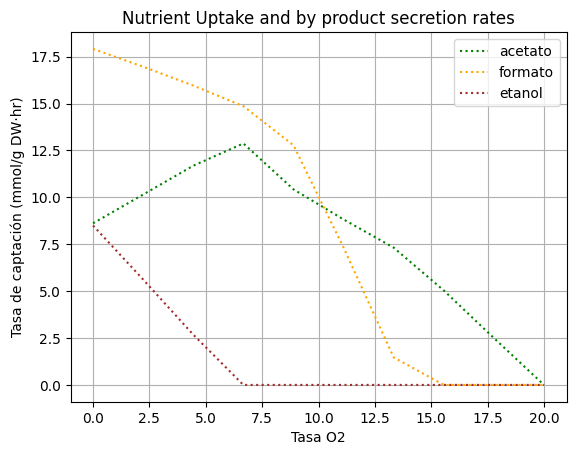

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Crear el gráfico
plt.plot(q_oxygen, q_acetate, label="acetato", linestyle=':', color='green')
plt.plot(q_oxygen, q_formate, label="formato", linestyle=':', color='orange')
plt.plot(q_oxygen, q_ethanol, label="etanol", linestyle=':', color='brown')
plt.xlabel('Tasa O2')
plt.ylabel('Tasa de captación (mmol/g DW·hr)')
plt.title('Nutrient Uptake and by product secretion rates')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
oxygen_rxn = model.reactions.get_by_id("EX_o2_e")
glucose_rxn = model.reactions.get_by_id("EX_glc__D_e")















o2=[0, 7, 12, 16, 20]
glucshadow=[]
o2shadow=[]
for qo2 in o2:
    oxygen_rxn.bounds= [-qo2,-qo2]
    glucose_rxn.bounds = [-10,-10]
    FBA_sol= model.optimize()
    print(FBA_sol)
    print(FBA_sol.fluxes[oxygen_rxn.id])
    print(FBA_sol.fluxes[glucose_rxn.id])


    glucshadow.append(round(FBA_sol.shadow_prices['glc__D_e'], 3))
    o2shadow.append(round(FBA_sol.shadow_prices['o2_e'], 3))
    print(o2shadow)


<Solution 0.188 at 0x78f48faba5f0>
0.0
-10.0
[-0.104]
<Solution 0.481 at 0x78f48fabab00>
-7.0
-10.0
[-0.104, -0.039]
<Solution 0.675 at 0x78f48df07640>
-12.0
-10.0
[-0.104, -0.039, -0.039]
<Solution 0.811 at 0x78f48e0d49a0>
-16.0
-10.0
[-0.104, -0.039, -0.039, -0.03]
<Solution 0.929 at 0x78f48db34580>
-20.0
-10.0
[-0.104, -0.039, -0.039, -0.03, -0.0]


# PPP

In [ ]:
import cobra
from cobra import Model, Reaction, Metabolite
from cobra.flux_analysis import production_envelope
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.axes3d import Axes3D
import sympy as sym

In [ ]:

model = load_model("iAF1260")

In [ ]:
oxygen_rxn = model.reactions.get_by_id("EX_o2_e")
glucose_rxn = model.reactions.get_by_id("EX_glc__D_e")
biomass_rxn = model.reactions.get_by_id("BIOMASS_Ec_iAF1260_core_59p81M")
acetate_rxn = model.reactions.get_by_id("EX_ac_e")
formate_rxn = model.reactions.get_by_id("EX_for_e")
ethanol_rxn = model.reactions.get_by_id("EX_etoh_e")
CO2_rxn = model.reactions.get_by_id("EX_co2_e")
ATPM= model.reactions.get_by_id("ATPM")



In [ ]:
FBA_sol= model.optimize()

In [ ]:
FBA_sol.shadow_prices

,shadow_prices
2agpg161_c,-0.487496
2agpg161_p,-0.487496
2agpg180_c,-0.521099
2agpg180_p,-0.521099
2agpg181_c,-0.517588
...,...
xylu__L_e,-0.079243
xylu__L_p,-0.079243
zn2_c,-0.000000
zn2_e,-0.000000


In [ ]:
oxygen_rxn = model.reactions.get_by_id("EX_o2_e")
glucose_rxn = model.reactions.get_by_id("EX_glc__D_e")
biomass_rxn = model.reactions.get_by_id("BIOMASS_Ec_iAF1260_core_59p81M")
acetate_rxn = model.reactions.get_by_id("EX_ac_e")
formate_rxn = model.reactions.get_by_id("EX_for_e")
ethanol_rxn = model.reactions.get_by_id("EX_etoh_e")
CO2_rxn = model.reactions.get_by_id("EX_co2_e")
ATPM= model.reactions.get_by_id("ATPM")

glucose = np.linspace(0,10,50)
oxygen=np.linspace(0,40,50)

gluc=[]
o2=[]
u=[]
glucshadow=[]
o2shadow=[]

for qglc in glucose:
  for qo2 in oxygen:
    oxygen_rxn.bounds = [-qo2,-qo2]
    glucose_rxn.bounds = [-qglc,-qglc]
    FBA_sol= model.optimize()

    if FBA_sol.status == "optimal":
      gluc.append(qglc)
      o2.append(qo2)
      u.append(FBA_sol.objective_value)
      glucshadow.append(round(FBA_sol.shadow_prices['glc__D_e'], 3))
      o2shadow.append(round(FBA_sol.shadow_prices['o2_e'], 3))




/usr/local/lib/python3.10/dist-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


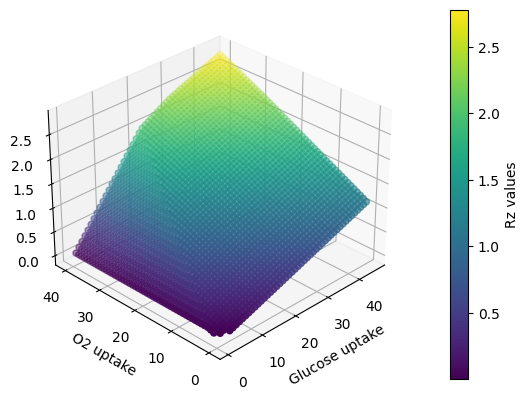

In [ ]:
g = np.array(gluc)
o = np.array(o2)
mu = np.array(u)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Scatter plot
sc = ax.scatter3D(g, o, mu, c=mu, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('Glucose uptake')
ax.set_ylabel('O2 uptake')
ax.set_zlabel('mu')


ax.view_init(elev=30, azim=225)

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Rz values')

plt.show()


In [ ]:
from cobra.flux_analysis import phenotype_phase_plane


In [ ]:
data = phenotype_phase_plane()
data.plot_matplotlib();

TypeError: 'module' object is not callable

In [ ]:
import pandas as pd
from tabulate import tabulate

# Crear un DataFrame
data = {
    'Glucose uptake': g,
    'O2 uptake': o,
    'mu': mu,
    "Shadow Price glucose":glucshadow,
    "Shadow Price o2":o2shadow,
}

df = pd.DataFrame(data)

# Mostrar la tabla
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))


+--------------------+--------------------+----------------------+----------------------+-----------------+
|   Glucose uptake   |     O2 uptake      |          mu          | Shadow Price glucose | Shadow Price o2 |
+--------------------+--------------------+----------------------+----------------------+-----------------+
| 0.9183673469387755 | 1.6326530612244898 | 0.008683516850728807 |        -0.029        |     -0.039      |
| 0.9183673469387755 | 2.4489795918367347 | 0.03381711285257283  |        -0.044        |     -0.029      |
| 0.9183673469387755 | 3.2653061224489797 | 0.05455214769437919  |        -0.097        |      -0.0       |
| 0.9183673469387755 | 4.081632653061225  | 0.054552147694380826 |        -0.097        |      -0.0       |
| 0.9183673469387755 | 4.8979591836734695 | 0.054552147694380826 |        -0.097        |      -0.0       |
| 0.9183673469387755 | 5.714285714285714  | 0.054552147694380826 |        -0.097        |      -0.0       |
| 0.9183673469387755 | 6.530

In [ ]:
from cobra.flux_analysis import production_envelope
prod_env = production_envelope(model, ["EX_glc__D_e", "EX_o2_e"])
prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.929292,9.897674,NaN,-10.0,-40.0
1,EX_glc__D_e,0.0,0.0,NaN,0.929292,9.897674,NaN,-10.0,-40.0
2,EX_glc__D_e,0.0,0.0,NaN,0.929292,9.897674,NaN,-10.0,-40.0
3,EX_glc__D_e,0.0,0.0,NaN,0.929292,9.897674,NaN,-10.0,-40.0
4,EX_glc__D_e,0.0,0.0,NaN,0.929292,9.897674,NaN,-10.0,-40.0


In [ ]:
prod_env = production_envelope(
    model, ["EX_o2_e"], objective="BIOMASS_Ec_iAF1260_core_59p81M", carbon_sources="EX_glc__D_e")

In [ ]:
prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.929292,9.897674,NaN,-40.0
1,EX_glc__D_e,0.0,0.0,NaN,0.929292,9.897674,NaN,-40.0
2,EX_glc__D_e,0.0,0.0,NaN,0.929292,9.897674,NaN,-40.0
3,EX_glc__D_e,0.0,0.0,NaN,0.929292,9.897674,NaN,-40.0
4,EX_glc__D_e,0.0,0.0,NaN,0.929292,9.897674,NaN,-40.0


In [ ]:
%matplotlib inline

In [ ]:
prod_env.plot(
    kind='line', x='EX_glc__D_e', y='flux_maximum');

KeyError: 'EX_glc__D_e'

# ATP

El ATP de mantenimiento es constante y no se relaciona con la tasa de crecimiento celular, es decir, se requiere incluso si el organismo no está dividiéndose ni produciendo nuevas células.

En FBA, este valor se suele representar como un flujo fijo que representa el costo energético basal que se necesita para que la célula siga funcionando.

# PROBLEMÁTICAS

El FBA es un modelo de estado estacionario, lo que significa que asume que los flujos metabólicos están en equilibrio y no incorpora las dinámicas dependientes del tiempo o los cambios regulatorios que ocurren con el tiempo. Esto hace que el FBA sea muy eficaz para predecir la distribución óptima de flujos metabólicos para un objetivo dado (como maximizar el crecimiento o la formación de productos), pero menos eficaz para capturar las transiciones metabólicas temporales que implican cambios regulatorios que requieren tiempo para manifestarse.